In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Specify the path to your CSV file
# data_path = 'E:\\THESIS\\MS\\Data Collection - Preparation\\rg1-revised-cleaned-with-popcount-and-neighbors.csv'
data_path = '/content/drive/MyDrive/MS thesis/HFCAI/CALABARZON/calabarzon_cleaned_sum.csv'
df = pd.read_csv(data_path)
df.head(2)

,ID,barangay_name,city_name,province_name,children_m,elderly_me,women_mean,youth_mean,women_repr,general_me,...,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,youth_children_sum,youth_elderly_sum,youth_phall_sum,youth_women_sum,youth_women_repr_sum,youth_youth_sum
0,2941561,Balaytigui,Nasugbu,Batangas,NaN,NaN,NaN,NaN,NaN,2.593221,...,0,0,2971948,41.388247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2942942,Balaytigui,Nasugbu,Batangas,0.36344,0.211141,1.604326,0.593618,0.850622,1.762146,...,0,1,2971948,41.271550,0.001364,0.000792,0.012129,0.006019,0.003191,0.002227


In [ ]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name', 'children_m',
       'elderly_me', 'women_mean', 'youth_mean', 'women_repr', 'general_me',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you'],
      dtype='object')

In [ ]:
# Rename columns
column_mapping = {
    'youth_children_sum': 'popden_chi',
    'youth_elderly_sum': 'popden_eld',
    'youth_women_sum': 'popden_wom',
    'youth_women_repr_sum': 'popden_w_1',
    'youth_youth_sum': 'popden_you',
    'youth_phall_sum': 'popden_all',
}


df = df.rename(columns=column_mapping)
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df[df['RHU_Presence'] == 1]

dropcols = ['children_m',
       'elderly_me', 'women_mean', 'youth_mean', 'women_repr', 'general_me']
df = df.drop(columns=dropcols)

# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rain intensity_value', 'buildability_landcov']


In [ ]:
# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rain intensity_value', 'buildability_landcov']


In [ ]:
# Impute NaNs with 0, considering data type safety
for col in columns_with_nan:
    # Check data type before imputing (avoid unintended conversions)
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)  # Impute with 0 for numeric columns
    else:
        df[col] = df[col].fillna('NA')  # Impute with 'NA' for non-numeric columns
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you
0,2941561,Balaytigui,Nasugbu,Batangas,0.547602,1.379736,1.061817,0.0,0,0,0,2971948,41.388247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2942942,Balaytigui,Nasugbu,Batangas,0.547602,1.379736,1.061817,0.0,0,0,1,2971948,41.271550,0.001364,0.000792,0.012129,0.006019,0.003191,0.002227
2,2942943,Balaytigui,Nasugbu,Batangas,0.547602,1.379736,1.061817,0.0,0,0,0,2971948,41.391750,4.724720,2.744833,42.027466,20.856238,11.058086,7.717034
3,2949831,Barangay 8 (Manuel S. Rojas),City of Cavite,Cavite,0.818004,1.093190,0.907145,1.0,0,0,0,2971948,22.516565,17.251052,6.571838,151.930272,75.921898,40.929798,27.108796
4,2951212,Barangay 8 (Manuel S. Rojas),City of Cavite,Cavite,0.818004,1.093190,0.907145,1.0,0,0,1,2971948,21.748555,38.483116,14.660254,338.921376,169.364234,91.304934,60.473468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7503,3180648,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,1.0,0,0,0,3114331,73.966609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7504,3180649,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,0.0,0,0,0,3114331,73.798172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7505,3182031,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,0.0,0,0,1,3114331,75.026516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7506,3182032,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,0.0,0,0,0,3114331,74.685667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
columns_with_nan = [col for col in df.columns if df[col].isna().any()]
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [ ]:
def HCI_calc(total_ai, total_gi, total_hi, total_ji, total_ki, total_mi,
              distance, road_bi, POI_ci, landCov_di, hazard1_ei, hazard2_ei, hazard3_ei, rhus_fi):

    total_vulnerable = total_gi + total_hi + total_ji + total_ki + total_mi
    total_pop = total_ai
    population_to_be_served = total_vulnerable + np.maximum(0, total_pop - total_vulnerable)

    # Calculate y for the entire Series without using if condition
    y = np.where(population_to_be_served == 0, 0, 20000 / ((population_to_be_served) * (distance + rhus_fi)))
    mc = np.tanh(y)

    w_bi = 0.3 # roads
    w_ci = 0.2 # POIs
    w_di = 0.5 # land cov

    b = (POI_ci * w_ci) + (road_bi * w_bi) + (landCov_di * w_di)

    # Normalize each factor
    rain_intensity_normalized = (hazard1_ei - hazard1_ei.min()) / (hazard1_ei.max() - hazard1_ei.min())
    flood_probability_normalized = (hazard2_ei - hazard2_ei.min()) / (hazard2_ei.max() - hazard2_ei.min())
    drought_mean_normalized = (hazard3_ei - hazard3_ei.min()) / (hazard3_ei.max() - hazard3_ei.min())
    w_rain = 0.4
    w_flood = 0.3
    w_drought = 0.3
    c = (w_rain * rain_intensity_normalized) + (w_flood * flood_probability_normalized) + (w_drought * drought_mean_normalized)

    f = b - c
    f = np.tanh(f)

    hci = mc * f
    hcfai = (1 + np.tanh(hci / 2)) / 2  # Sigmoid function

    return hcfai

In [ ]:
# VARIABLES
# population vulnerable
popall = df["popden_all"]
children = df["popden_chi"]
elderly = df["popden_eld"]
women = df["popden_wom"]
women_reproductive = df["popden_w_1"]
youth = df["popden_you"]
distance = df["Distance_to_Nearest_RHU_km"]

flood = df["flood_probability_value"]
rain_intensity = df["rain intensity_value"]
drought = df["drought_value"]
roads = df["Road_Presence"]
rhus = df["RHU_Presence"]
pois = df["POI_Presence"]
buildability = df["buildability_landcov"]

In [ ]:
df['HCFAI'] = HCI_calc(popall, children, elderly, women, women_reproductive, youth, distance,
    roads, pois, buildability, drought, rain_intensity, flood, rhus)

# Data exploration and visualization

In [ ]:
print(max(list(df['HCFAI'].unique())))
# list(df['HCFAI'].unique())
print(min(list(df['HCFAI'].unique())))
# list(df['drought_value'])
# list(df['rain intensity_value'])
# list(df['flood_probability_value'])
for col in df.columns:
  print(col)

0.6576463970756065
0.3430304478987062
ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


In [ ]:
# mid_to_high = []
# for i in list(df['HCFAI']):
#     if i >= 0.53:
#         mid_to_high.append(i)

# filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
# filtered_original_df = df[df['RHU_Presence'] == 1]

# x = df['HCFAI'].notna() # removing nan values
# x = df[x]
x=df[['popden_all', 'popden_you', "popden_w_1",
                      "popden_wom", "popden_eld", 'popden_chi',
                      'Distance_to_Nearest_RHU_km', "POI_Presence", "Road_Presence", "RHU_Presence",
                      'buildability_landcov', "drought_value", "rain intensity_value",
                         "flood_probability_value", "HCFAI"]]
x = x.sort_values(by='HCFAI', ascending=False)
# x[x['RHU_Presence']==0] # 4674 rows
x # 4701 rows
# len(locs_with_RHU['RHU_Presence'])

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
2633,17.093573,3.240776,4.190865,8.385755,0.994371,2.169909,22.808192,1,1,0,1.0,0.688586,1.127687,0.189871,0.657646
2636,65.932353,12.500136,16.164765,32.345055,3.835431,8.369649,18.998063,1,1,0,1.0,0.688586,1.127687,0.189871,0.657646
3224,343.827152,70.581578,88.460592,169.211608,17.442333,39.725155,11.678032,1,1,0,1.0,0.841624,1.413863,0.398953,0.638963
2733,105.070904,19.310546,24.827600,50.224001,5.587334,13.423550,15.366093,1,1,0,1.0,0.966366,1.236450,0.215859,0.637936
2640,268.963236,51.317262,73.537848,137.232045,17.588286,25.767198,14.992936,1,1,0,1.0,0.907626,1.169706,0.431566,0.637824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,794.619496,144.453581,196.810483,398.133418,53.616185,98.511545,8.406230,0,0,0,0.0,1.359662,2.064010,1.132209,0.345872
2777,882.610511,162.955043,212.155207,444.449803,69.585099,100.686804,7.050756,0,0,0,0.0,1.390446,1.989843,1.083755,0.345705
2454,703.269076,139.317241,182.135773,359.483631,46.523734,80.905516,6.121444,0,0,0,0.0,1.428908,2.051104,0.919175,0.345121
2963,864.172331,160.709194,214.339398,430.085715,53.860224,105.942526,6.117270,0,0,0,0.0,1.359662,2.064010,1.132209,0.344811


In [ ]:
locs_with_RHU = x[x['RHU_Presence']==1] # 27 rows (bcos there are nan values we disregarded)
locs_with_RHU

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
2012,11548.711101,1982.161479,3142.437696,5783.498842,748.391335,1206.697873,0.0,1,0,1,1.0,1.006410,1.161028,0.688865,0.557739
1547,52575.914013,10066.089930,14894.827392,26459.263314,2827.875504,5434.286089,0.0,1,1,1,0.0,0.977523,0.984535,0.832794,0.505563
783,27920.958940,5337.458080,7679.249704,14055.187699,1935.937180,2962.826285,0.0,1,1,1,0.0,1.046612,1.124705,0.771205,0.504555
1546,44556.425928,8759.213363,13215.921593,22943.366878,2842.258103,4203.486433,0.0,1,1,1,0.0,1.059179,0.895851,0.882645,0.503219
382,8049.010116,1499.574238,2220.324693,4094.087924,812.843865,658.745788,0.0,1,1,1,0.0,1.105369,1.477501,0.526595,0.501549
3736,2193.879337,424.309282,544.488245,1059.332847,146.449363,256.409276,0.0,1,1,1,0.0,0.801257,2.372934,1.096508,0.488241
1350,20908.651113,4546.388991,6131.312720,10793.373861,1407.705376,1924.275195,0.0,1,1,1,0.0,1.249972,1.855737,0.367578,0.487688
892,54059.595910,10166.067474,15925.633852,27916.684100,3445.871289,5208.886668,0.0,1,0,1,0.0,0.962089,1.181400,0.807639,0.481690
1756,52709.942906,10549.938460,15002.828904,26861.602186,3093.468720,6136.311412,0.0,1,0,1,0.0,0.879734,2.311374,0.461346,0.478917
1481,46581.737839,8901.105447,13373.494940,23458.744010,2168.984701,5008.969121,0.0,1,0,1,0.0,1.004190,0.992960,0.836964,0.478396


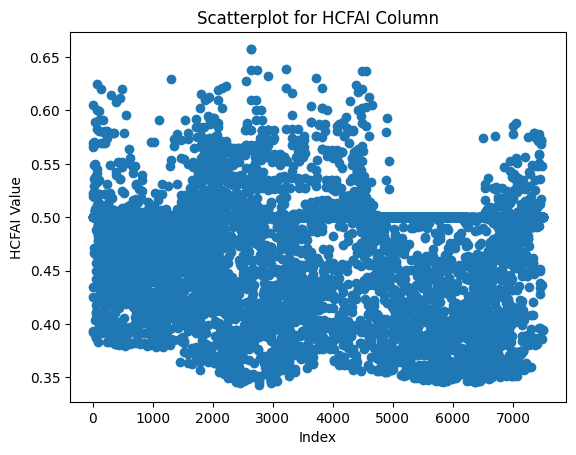

In [ ]:
# Scatterplot for the 'HCFAI' column
plt.scatter(x.index, x['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Feasibility Factors

In [ ]:
# a = a['buildability_landcov'].notna()
a = df[['Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov',
       'drought_value', 'rain intensity_value', 'flood_probability_value', 'HCFAI']]

a = a[a['RHU_Presence']==0]
a = a.sort_values(by='HCFAI', ascending=False)
a

,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
2636,1,1,0,1.0,0.688586,1.127687,0.189871,0.657646
2633,1,1,0,1.0,0.688586,1.127687,0.189871,0.657646
2018,1,1,0,1.0,0.713296,1.477339,0.524898,0.643539
2148,1,1,0,1.0,0.887326,1.078612,0.461871,0.640074
4605,1,1,0,1.0,0.602418,2.223588,0.470621,0.639773
...,...,...,...,...,...,...,...,...
3062,0,0,0,0.0,1.359662,2.064010,1.132209,0.344480
2683,0,0,0,0.0,1.417323,2.017259,1.018695,0.344146
2599,0,0,0,0.0,1.417323,2.017259,1.018695,0.344146
2775,0,0,0,0.0,1.415058,2.017468,1.079665,0.343030


# Maximal Coverage Factors

In [ ]:
b = df[['popden_you', 'popden_wom', 'popden_eld', 'popden_chi',
       'popden_w_1', 'popden_all', 'Distance_to_Nearest_RHU_km', 'RHU_Presence', 'HCFAI']]
# b = b[b['buildability_landcov']==1]
b = b.sort_values(by='HCFAI', ascending=False)
# b[b['RHU_Presence']==1]
b

,popden_you,popden_wom,popden_eld,popden_chi,popden_w_1,popden_all,Distance_to_Nearest_RHU_km,RHU_Presence,HCFAI
2633,0.462968,1.197965,0.142053,0.309987,0.598695,0.131234,22.808192,0,0.657646
2636,0.462968,1.197965,0.142053,0.309987,0.598695,0.222967,18.998063,0,0.657646
2018,2.363027,5.847296,0.640863,1.307103,3.174695,26.355544,10.321935,0,0.643539
2148,5.882630,15.921712,1.352289,3.864680,8.372308,3.568439,12.601937,0,0.640074
4605,5.270356,14.251041,1.475700,3.794656,7.420661,0.530137,20.907070,0,0.639773
...,...,...,...,...,...,...,...,...,...
3061,0.761132,2.165091,0.278432,0.503753,1.142673,3.668469,7.764747,0,0.344480
2683,2.505617,6.086964,0.701073,1.403070,3.250526,11.153110,2.685554,0,0.344146
2599,1.861765,4.675495,0.678184,0.869920,2.423505,12.742518,3.442872,0,0.344146
2776,2.277814,5.863148,0.867955,1.346539,3.047312,6.706934,5.510741,0,0.343030


# EDA

In [ ]:
c=df['HCFAI'].notna()
c = df[c]
# c = df[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
#        'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
#         'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
#         'flood_probability_value', 'HCFAI']]
# c = c[c['RHU_Presence']==1]
c = c.sort_values(by='HCFAI', ascending=False)
c = c[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
       'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
        'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
        'flood_probability_value', 'HCFAI']]
c.sort_values(by='HCFAI', ascending=False)

KeyError: "['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5', 'population_reproductive_women', 'popden_all_total_population'] not in index"

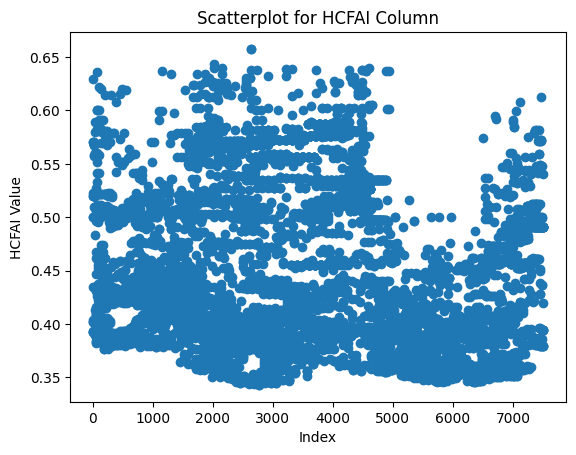

In [ ]:
# Scatterplot for the 'HCFAI' column
plt.scatter(c.index, c['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Exporting

In [ ]:
# Specify the file path for the CSV file
csv_file_path = '/content/drive/MyDrive/MS thesis/HFCAI/CALABARZON/calabarzon_HCFAI_sum.csv'
# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)
print(f'DataFrame exported to CSV file: {csv_file_path}')

DataFrame exported to CSV file: /content/drive/MyDrive/MS thesis/HFCAI/CALABARZON/calabarzon_HCFAI_sum.csv
